#Data Analytics with Python: *An Intro*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

## Load and View

In [ ]:
salaries_df = pd.read_csv("/content/drive/MyDrive/Classroom/ECO6800_22/data/Salary Dataset.csv")

In [ ]:
salaries_df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [ ]:
salaries_df.tail()

,Company Name,Job Title,Salaries Reported,Location,Salary
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo"
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr"
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr"
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr"
4343,vPhrase,Machine Learning Engineer,1.0,Mumbai,"₹9,39,843/yr"


In [ ]:
salaries_df.shape

(4344, 5)

In [ ]:
salaries_df.sample(10)

,Company Name,Job Title,Salaries Reported,Location,Salary
1477,State Bank of India,Data Scientist,1.0,Hyderabad,"₹11,59,476/yr"
3534,Rahul Infotech,Data Engineer,1.0,New Delhi,"₹4,00,000/yr"
3336,Attra,Data Engineer,2.0,Hyderabad,"₹7,39,714/yr"
2586,Deloitte,Data Analyst,7.0,New Delhi,"₹4,29,953/yr"
2138,Supermarket Grocery Supplies,Data Analyst,2.0,Bangalore,"₹7,17,222/yr"
1172,Apptware,Data Scientist,1.0,Pune,"₹20,73,969/yr"
4127,Synopsys,Machine Learning Engineer,1.0,Hyderabad,"₹5,15,944/yr"
260,Samsung Electronics,Data Scientist,2.0,Bangalore,"₹21,97,572/yr"
2043,Anheuser-Busch InBev,Data Analyst,4.0,Bangalore,"₹15,06,361/yr"
2993,Intuit,Data Engineer,4.0,Bangalore,"₹20,25,552/yr"


In [ ]:
salaries_df.Location.nunique()

5

In [ ]:
salaries_df['Job Title'].nunique()

26

## Clean and Format

### *Is there any missing salary data? If yes, how to Handle It?*

In [ ]:
salaries_df.shape, salaries_df.dropna().shape

((4344, 5), (4339, 5))

In [ ]:
salaries_df[salaries_df.isna().any(axis=1)]

,Company Name,Job Title,Salaries Reported,Location,Salary
2279,NaN,Data Analyst,1.0,Pune,"₹23,500/mo"
3227,NaN,Data Engineer,1.0,Pune,"₹26,20,604/yr"
4026,NaN,Machine Learning Engineer/Data Scientist,1.0,Pune,"₹56,465/mo"
4027,First Student Data Scientist,Data Analyst,NaN,Pune,"₹4,53,300/yr"
4237,Amazon,Machine Learning Data Associate II,NaN,New Delhi,"₹3,29,439/yr"


In [ ]:
# TODO: Now How to Handle it?

### *Are all salaries in same currency/units?*

In [ ]:
#First what are the data types in this dataframe?
salaries_df.dtypes

Company Name          object
Job Title             object
Salaries Reported    float64
Location              object
Salary                object
dtype: object

In [ ]:
s = salaries_df.Salary[0]
s

'₹6,48,573/yr'

In [ ]:
type(s)

str

In [ ]:
# So lets extract the units of s?
currency = s[0]
amount = s[1:].split("/")[0]
freq = s[1:].split("/")[1]
for v in currency, amount, freq:
  print (v, type(v))

₹ <class 'str'>
6,48,573 <class 'str'>
yr <class 'str'>


In [ ]:
# TODO: can you convert amount to the correct data type?

In [ ]:
# So let's create new columns using what we have learnt
salaries_df['currency'] = salaries_df.Salary.apply(lambda s: s[0])
salaries_df['amount'] = salaries_df.Salary.apply(lambda x: x[1:].split("/")[0])
salaries_df['freq'] = salaries_df.Salary.apply(lambda x: x[1:].split("/")[1])

# salaries_df['amount'], salaries_df['freq'] = zip(*salaries_df.Salary.apply(lambda x: x[1:].split("/"))) #ADVANCED (ignore for now)

In [ ]:
salaries_df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,amount,freq
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,"6,48,573",yr
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,"11,91,950",yr
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,"8,36,874",yr
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,"6,69,578",yr
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,"9,44,110",yr


In [ ]:
salaries_df.dtypes

Company Name          object
Job Title             object
Salaries Reported    float64
Location              object
Salary                object
currency              object
amount                object
freq                  object
dtype: object

In [ ]:
salaries_df.currency.value_counts(dropna=False)

₹    4318
$      19
£       6
A       1
Name: currency, dtype: int64

In [ ]:
salaries_df.freq.value_counts(dropna=False)

yr    3232
mo    1090
hr      22
Name: freq, dtype: int64

*For the purpose of this lecture we'll only consider the INR salaries, and only the yearly and monthly frequencies.*

In [ ]:
df = salaries_df[(salaries_df.freq != 'hr') & (salaries_df.currency == '₹')]
print(df.shape)

(4298, 8)


In [ ]:
# TODO: Can you perform the above filtering operation using apply and lambda?

In [ ]:
# convert amount to the correct data type
df.amount = df.amount.str.replace(',', '').astype('float')
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Company Name,Job Title,Salaries Reported,Location,Salary,currency,amount,freq
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,648573.0,yr
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,1191950.0,yr
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,836874.0,yr
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,669578.0,yr
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,944110.0,yr


In [ ]:

df.columns

Index(['Company Name', 'Job Title', 'Salaries Reported', 'Location', 'Salary',
       'currency', 'amount', 'freq'],
      dtype='object')

In [ ]:
# Bring all salaries to annual units
df.amount = df.apply(lambda x: x['amount']*12 if x['currency']=='mo' else x['amount'], axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Company Name,Job Title,Salaries Reported,Location,Salary,currency,amount,freq
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,648573.0,yr
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,1191950.0,yr
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,836874.0,yr
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,669578.0,yr
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,944110.0,yr


## Analyse & Visualize

In [ ]:
# Maximum Salary
df.amount.max()

9568943.0

In [ ]:
# Summary Stats
df.describe()

,Salaries Reported,amount
count,4296.000000,4.298000e+03
mean,2.792831,7.742363e+05
std,5.171193,7.701737e+05
min,1.000000,2.010000e+03
25%,1.000000,1.234942e+05
50%,1.000000,6.223065e+05
75%,3.000000,1.104027e+06
max,105.000000,9.568943e+06


In [ ]:
df.describe(include='all')

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,amount,freq
count,4295,4298,4296.000000,4298,4298,4298,4.298000e+03,4298
unique,2514,26,NaN,5,3056,1,NaN,2
top,Tata Consultancy Services,Data Scientist,NaN,Bangalore,"₹12,00,000/yr",₹,NaN,yr
freq,40,1820,NaN,1571,24,4298,NaN,3211
mean,NaN,NaN,2.792831,NaN,NaN,NaN,7.742363e+05,NaN
std,NaN,NaN,5.171193,NaN,NaN,NaN,7.701737e+05,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,2.010000e+03,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,1.234942e+05,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,6.223065e+05,NaN
75%,NaN,NaN,3.000000,NaN,NaN,NaN,1.104027e+06,NaN


In [ ]:
df.Location.mode()

0    Bangalore
dtype: object

In [ ]:
df.amount.mean(), df.amount.median()

(774236.3306188926, 622306.5)

In [ ]:
#Location wise mean and median
df.groupby('Location').agg({'amount':['mean', 'median']})

amount          
                    mean    median
Location                          
Bangalore  898290.817314  750000.0
Hyderabad  682457.634441  572392.0
Mumbai     681568.705298  524564.0
New Delhi  695243.672282  594543.0
Pune       741341.961634  523603.5

In [ ]:
#Location wise unique employers
df.groupby('Location').agg({'amount':['mean', 'median'], 'Company Name': ['nunique']})

amount           Company Name
                    mean    median      nunique
Location                                       
Bangalore  898290.817314  750000.0         1127
Hyderabad  682457.634441  572392.0          466
Mumbai     681568.705298  524564.0          445
New Delhi  695243.672282  594543.0          444
Pune       741341.961634  523603.5          562

In [ ]:
#TODO: Location wise top employer?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


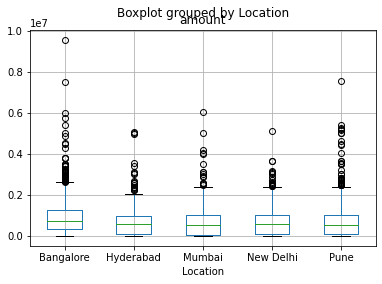

In [ ]:
#TODO: Compare distribution of salaries by location...
df.boxplot(column='amount', by='Location')

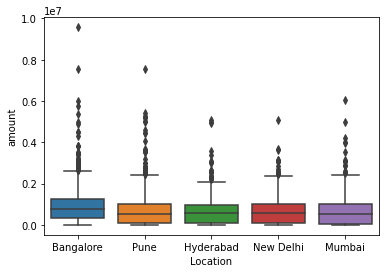

In [ ]:
import seaborn as sns
sns.boxplot(x=df.Location, y=df.amount)

# *Pandas Foundations*: [10 minutes to Pandas...](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

# *Python Foundations*: An Informal Intro To Python

# **Assignment for the week**

1. (20 Points) Which (location, job-title) pair has most salaries *reported*?

2. (20 Points) Can you plot the salary distributions, by job-title? Which job title offers the highest mean and median salaries? NOTE: You can ignore the impact of "number of reported salaries" for this question. 

3. (20 Points) Make sense of Job-Titles: Derive two new columns, 'Level' and 'Field' from the job-title. Suggestions:
> * Level may resolve into one of the following values: Associate, Junior, Senior, Lead, Consultant, Manager
> * Field may resolve into one of the following values: Data Science, Data Engineering, Machine Learning, Data Analysis

4. (20 Points, dependent on 3) Visualize field wise average-salaries ofered by big_techs:
> * Create the following set for big_techs {'IBM', 'Google', 'Apple', 'Microsoft', 'Amazon'}. Filter the data to only these companies. (HINT: filter using a lambda function that looks 'in' the above set)
> * Create a grouped-bar chart with Field on the x-axis, with bar color indicating the company and height indicating the average offered salary. (HINT: Use sns.barplot) 

5. (20 Points) In the lecture, we ignored other currencies. Can you include "$" & "£", perform the conversions into "₹" and check if the highest salary changes?

6.   BONUS CHALLENGE (20 points): If you observe carefully, there is one data analyst from Pune, who has been paid "AFN 1,56,179/yr":
>*   What are the values of currency, amount and freq obtained as per the code provided in the lecture? Why are they incorrect? 
>*   How can you correct them? HINT: Google for Pattern-Matching/Regular-Expressions in Python.









---



